In [1]:
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, mean_absolute_error, \
    mean_squared_error, r2_score

# Classifiers for the Single Label Optimal Play

In [2]:
# Setup to train learning models
A = np.loadtxt('tictac_single.txt')
X_single = A[:, :9]  # Input features
y_single = A[:, 9:].ravel()  # Output labels

# X is a 3x3 grid for tictactoe. It should go like this:
#   x0  |   x1  |   x2
#   x3  |   x4  |   x5
#   x6  |   x7  |   x8

# Y gives the output of the game (the winner)

if y_single.ndim > 1 and y_single.shape[1] > 1:
    y_single = np.argmax(y_single, axis=1)

X_train, X_test, y_train, y_test = train_test_split(X_single, y_single, 
                                                                    test_size=0.2, random_state=42, 
                                                                    stratify=y_single)

# LETS DOWNSIZE

downsampled_X_train, downsampled_y_train = resample(X_train, y_train, 
                                                                     replace=False, n_samples=2000, 
                                                                     random_state=42)

SVM Model

*****************Linear SVM - Single*****************
Accuracy: 0.4652936689549962
Cross-Validation Accuracy: 0.3651380096816235



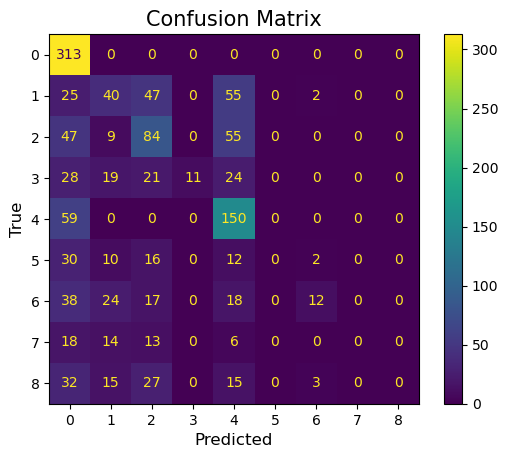

In [3]:
# **************SVM Model******************* single.txt
# scaler = StandardScaler()
# X_std = scaler.fit_transform(X_train)
# X_test_std = scaler.transform(X_test)

# svm_clf_single = LinearSVC(C=100.0, dual=True, max_iter=100000) # Accuracy of 25%
svm_clf_single = SVC(kernel='linear', C=100.0) # Accuracy of 46.52%
svm_clf_single.fit(downsampled_X_train, downsampled_y_train)

svm_y_pred = svm_clf_single.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_y_pred)
svm_cm = confusion_matrix(y_test, svm_y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=svm_cm)
ax = disp.plot().ax_

disp.ax_.set_xlabel('Predicted', fontsize=12)
disp.ax_.set_ylabel('True', fontsize=12)
disp.ax_.set_title('Confusion Matrix', fontsize=15)

print("*****************Linear SVM - Single*****************")
print(f'Accuracy: {svm_accuracy}')
#print('Confusion Matrix:')
#print(svm_cm)

svm_scores = cross_val_score(svm_clf_single, X_single, y_single, cv=10)
print(f'Cross-Validation Accuracy: {svm_scores.mean()}\n')

Multilayer Perceptron Model

In [4]:
# ********************MLP Model**************************** single.txt

mlp_clf_single = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1900, random_state=42)

# Train the model
mlp_clf_single.fit(X_train, y_train)

mlp_y_pred = mlp_clf_single.predict(X_test)
mlp_accuracy = accuracy_score(y_test, mlp_y_pred)
mlp_cm = confusion_matrix(y_test, mlp_y_pred)

print("*****************MLP Model - Single*****************")
print(f'Accuracy: {mlp_accuracy}')
print('Confusion Matrix:')
print(mlp_cm)

mlp_scores = cross_val_score(mlp_clf_single, X_single, y_single, cv=10)
print(f'Cross-Validation Accuracy: {mlp_scores.mean()}\n')

*****************MLP Model - Single*****************
Accuracy: 0.9366895499618612
Confusion Matrix:
[[301   0   3   2   4   0   1   2   0]
 [  0 157   2   2   3   1   2   2   0]
 [  2   8 175   6   3   0   1   0   0]
 [  1   0   0 100   1   0   0   1   0]
 [  2   2   0   1 200   0   0   2   2]
 [  1   0   2   3   0  64   0   0   0]
 [  6   0   0   0   0   0 103   0   0]
 [  2   0   2   3   0   0   0  44   0]
 [  1   1   4   1   0   0   1   0  84]]
Cross-Validation Accuracy: 0.9403237292869113



K-Nearest Neighbors Model

In [5]:
# *****************KNN Model************************* single.txt
# Instantiate the kNN classifier with a specific value of k
knn_clf_single = KNeighborsClassifier(n_neighbors=5, metric='euclidean')  # Adjust the value of n_neighbors and metric as needed
# Standardize the feature values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_single)

# Split the scaled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_single, test_size=0.2, random_state=42)

# Train the Model
knn_clf_single.fit(X_train, y_train)
y_pred = knn_clf_single.predict(X_test)

print("*****************KNN Model - Single*****************")

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')

# Print classification report
print(classification_report(y_test, y_pred))

# Print confusion matrix
print(confusion_matrix(y_test, y_pred))

*****************KNN Model - Single*****************
Accuracy: 0.7391304347826086
              precision    recall  f1-score   support

         0.0       0.78      0.85      0.81       323
         1.0       0.65      0.61      0.63       168
         2.0       0.76      0.74      0.75       187
         3.0       0.66      0.65      0.65       117
         4.0       0.73      0.80      0.76       202
         5.0       0.78      0.62      0.69        76
         6.0       0.74      0.77      0.75        99
         7.0       0.92      0.70      0.80        50
         8.0       0.74      0.64      0.69        89

    accuracy                           0.74      1311
   macro avg       0.75      0.71      0.73      1311
weighted avg       0.74      0.74      0.74      1311

[[275   4   9   4  22   1   5   2   1]
 [ 13 103  13   9  13   3   7   0   7]
 [ 14   9 139   8   9   1   5   0   2]
 [ 10   7   4  76   6   5   3   1   5]
 [ 18   9   5   7 161   0   2   0   0]
 [  7  11   3   0 

# Classifiers for the Final Boards

In [6]:
# Setup to train learning models **************** 2nd dataset
A = np.loadtxt('tictac_final.txt')
X_final = A[:, :9]   # Input features
y_final = A[:, 9:].ravel()   # Output labels

X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.2, random_state=42, stratify=y_final)

SVM Model

In [7]:
# **************SVM Model******************* final.txt
svm_clf_final = SVC(kernel='linear', C=0.1)
svm_clf_final.fit(X_train, y_train)

svm_y_pred = svm_clf_final.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_y_pred)
svm_cm = confusion_matrix(y_test, svm_y_pred)

print("*****************SVM Model - Final*****************")
print(f'Accuracy: {svm_accuracy}')
print('Confusion Matrix:')
print(svm_cm)

svm_scores = cross_val_score(svm_clf_final, X_final, y_final, cv=10)
print(f'Cross-Validation Accuracy: {svm_scores.mean()}\n')

*****************SVM Model - Final*****************
Accuracy: 0.9739583333333334
Confusion Matrix:
[[ 62   5]
 [  0 125]]
Cross-Validation Accuracy: 0.983157894736842



Multilayer Perceptron Model

In [8]:
# ********************MLP Model**************************** final.txt
mlp_clf_final = MLPClassifier(hidden_layer_sizes=(100,), max_iter=2000, random_state=42)

# Train the model
mlp_clf_final.fit(X_train, y_train)

mlp_y_pred = mlp_clf_final.predict(X_test)
mlp_accuracy = accuracy_score(y_test, mlp_y_pred)
mlp_cm = confusion_matrix(y_test, mlp_y_pred)

print("*****************MLP Model - Final*****************")
print(f'Accuracy: {mlp_accuracy}')
print('Confusion Matrix:')
print(mlp_cm)

mlp_scores = cross_val_score(mlp_clf_final, X_final, y_final, cv=10)
print(f'Cross-Validation Accuracy: {mlp_scores.mean()}\n')

*****************MLP Model - Final*****************
Accuracy: 0.9739583333333334
Confusion Matrix:
[[ 62   5]
 [  0 125]]
Cross-Validation Accuracy: 0.9810745614035087



K-Nearest Neighbors Model

In [9]:
# *****************KNN Model************************* final.txt
# Instantiate the kNN classifier with a specific value of k
svm_clf_final = KNeighborsClassifier(n_neighbors=5, metric='euclidean')  # Adjust the value of n_neighbors and metric as needed
# Standardize the feature values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_final)

# Split the scaled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_final, test_size=0.2, random_state=42)

# Train the Model
svm_clf_final.fit(X_train, y_train)
y_pred = svm_clf_final.predict(X_test)

print("*****************KNN Model - Final*****************")

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Print classification report
print(classification_report(y_test, y_pred))

# Print confusion matrix
print(confusion_matrix(y_test, y_pred))

*****************KNN Model - Final*****************
Accuracy: 0.9947916666666666
              precision    recall  f1-score   support

        -1.0       1.00      0.99      0.99        67
         1.0       0.99      1.00      1.00       125

    accuracy                           0.99       192
   macro avg       1.00      0.99      0.99       192
weighted avg       0.99      0.99      0.99       192

[[ 66   1]
 [  0 125]]


# Regression Models for the Multi Label Optimal Play

In [10]:
# *****************Regression Models*****************

# Load tictac_multi.txt and put inputs and outputs into X and y
A = np.loadtxt('tictac_multi.txt')
X_multi = A[:, :9]   # Input features
y_multi = A[:, 9:]   # Output labels

print(X_multi)
print(y_multi)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_multi, y_multi, test_size=0.2, random_state=42)

[[ 1. -1.  0. ...  0.  1.  0.]
 [ 1.  0.  1. ...  0. -1.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 ...
 [-1. -1.  0. ...  1.  1.  0.]
 [ 0.  1.  1. ...  0.  1. -1.]
 [ 1.  1. -1. ... -1. -1.  0.]]
[[0. 0. 0. ... 1. 0. 1.]
 [0. 1. 0. ... 1. 0. 1.]
 [0. 0. 1. ... 0. 0. 1.]
 ...
 [0. 0. 1. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


Linear Regression

In [49]:
from sklearn.multioutput import MultiOutputRegressor
# *****************Linear Regression*****************

# Select Linear Regression model
linReg_clf = linear_model.LinearRegression()

multiOut = MultiOutputRegressor(linReg_clf)
multiOut.fit(X_train, y_train)

y_pred = multiOut.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print results
print("*****************Linear Regression Model*****************")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

*****************Linear Regression Model*****************
Mean Absolute Error: 0.33636781498699636
Mean Squared Error: 0.1684312800541522
R-squared: 0.002584556880345189


Multilayer Perceptron Regression

In [41]:
# *****************MLP Regression Model*****************

# Select MLP Regressor
mlpr_clf = MLPRegressor(hidden_layer_sizes=(1024, 128, 64, 32), max_iter=1200, random_state=42)

# Fit the model to training data
mlpr_clf.fit(X_train, y_train)

# Make prediction
y_pred = mlpr_clf.predict(X_test)

# Evaluate
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print results
print("*****************MLP Regression Model*****************")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}\n")

*****************MLP Regression Model*****************
Mean Absolute Error: 0.07143952032662397
Mean Squared Error: 0.020044011492462346
R-squared: 0.8785597678132322



K-Nearest Neighbors

In [39]:
# *****************K-Nearest Neighbors Regression*****************

# Select KNN Regression model
knnr_clf = KNeighborsRegressor(n_neighbors=17, weights='distance')

# Fit training data
knnr_clf.fit(X_train, y_train)

# Make a prediction
y_pred = knnr_clf.predict(X_test)

# Evaluate
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print results
print("*****************KNN Regression Model*****************")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}\n")

*****************KNN Regression Model*****************
Mean Absolute Error: 0.06653404000198976
Mean Squared Error: 0.0264071749274265
R-squared: 0.8397220420934628



# TicTacToe Game

In [14]:
class TicTacToe:
    def __init__(self, model):
        self.board = [[' ' for _ in range(3)] for _ in range(3)]
        self.current_player = 'X'
        self.model = model

    # Reset the board after game over. Board returns to 0 array
    def reset(self):
        self.board = [[' ' for _ in range(3)] for _ in range(3)]
        self.current_player = 'X'

    # Return true if (row, col) inputs are valid moves
    def is_valid_move(self, row, col):
        return 3 > row >= 0 and 0 <= col < 3 and self.board[row][col] == ' '

    # Print the current state of the board
    def print_board(self):
        print("  0   1   2")
        for i, row in enumerate(self.board):
            print(f'{i} {" | ".join(row)}')
            if i < 2:
                print(' ' + '-' * 11)

    # Check if move is valid, then input the move into the board
    def make_move(self, row, col):
        if self.is_valid_move(row, col):
            self.board[row][col] = self.current_player
            return True
        return False

    # If board is full return true, otherwise false
    def is_board_full(self):
        return all(all(cell != ' ' for cell in row) for row in self.board)

    # Switch to next player
    def switch_player(self):
        self.current_player = 'O' if self.current_player == 'X' else 'X'

    # Check to see who the winner is
    def check_winner(self):
        # Check rows, columns, and diagonals for a win
        for i in range(3):
            if self.board[i][0] == self.board[i][1] == self.board[i][2] != ' ':
                return self.board[i][0]
            if self.board[0][i] == self.board[1][i] == self.board[2][i] != ' ':
                return self.board[0][i]

        if self.board[0][0] == self.board[1][1] == self.board[2][2] != ' ':
            return self.board[0][0]
        if self.board[0][0] == self.board[1][1] == self.board[2][0] != ' ':
            return self.board[0][2]

        return None
    
    # Gameplay loop
    def play_game(self):
        while True:
            print(f"Player {self.current_player}'s turn")
            self.print_board()

            if self.current_player == 'X':
                while True:
                    row = int(input('Enter row (0-2): '))
                    col = int(input('Enter column (0-2): '))
                    if self.make_move(row, col):
                        break
                
                # Check for winner
                winner = self.check_winner()
                if winner:
                    print(f"Player {winner} wins!")
                    self.print_board()
                    break
                elif self.is_board_full():
                    print("It's a draw!")
                    self.print_board()
                    break
                else:
                    self.switch_player()
            else:
                while True:
                    # Use trained model to predict 0's move
                    board_state = np.array(self.board).flatten()
                    board_state = np.where(board_state == 'X', 1, board_state)
                    board_state = np.where(board_state == 'O', -1, board_state)
                    board_state = np.where(board_state == ' ', 0, board_state)
                    board_state = board_state.astype(int)
                    
                    # Try runs if the model is a classifier, otherwise except runs as regression
                    try:
                        move = int(self.model.predict([board_state])[0])
                    # move = int(self.model.predict([board_state])[0])])
                    except:  # we have an array and we want one prediction
                        arr = (self.model.predict([board_state])[0])  # should be an array
                        highestIndex = 0
                        highestVal = 0
                        for i in range(len(arr)):
                            if arr[i] > highestVal:
                                highestIndex = i
                                highestVal = arr[i]
                        print(highestIndex)
                        move = highestIndex
                    # move = self.model.predict( [ board_state[0], board_state[1] ] )
                    print(f"Board state: {board_state}")
                    print(f"Predicted move: {move}")

                    row, col = divmod(move, 3)
                    print(f"Row, Col: {row}, {col}")
                    if not self.make_move(row, col):
                        print("Unable to move")
                        continue
                    else: 
                        break

                # Check for winner
                winner = self.check_winner()
                if winner:
                    print(f"Player {winner} wins!")
                    self.print_board()
                    break
                elif self.is_board_full():
                    print("It's a draw!")
                    self.print_board()
                    break
                else:
                    self.switch_player()

Main Function

In [16]:
if __name__ == '__main__':
    while True:
        print("TicTacToe Game\n")
        print("Select Model")
        print("------------")
        print("1. Play\n2. Exit")
        res = input("What do you want to do? ")

        match res:
            case "1":
                game = TicTacToe(mlpr_clf)
                game.play_game()
            case "2":
                break
        

TicTacToe Game

Select Model
------------
1. Play
2. Exit
Player X's turn
  0   1   2
0   |   |  
 -----------
1   |   |  
 -----------
2   |   |  
Player O's turn
  0   1   2
0 X |   |  
 -----------
1   |   |  
 -----------
2   |   |  
8
Board state: [1 0 0 0 0 0 0 0 0]
Predicted move: 8
Row, Col: 2, 2
Player X's turn
  0   1   2
0 X |   |  
 -----------
1   |   |  
 -----------
2   |   | O
Player O's turn
  0   1   2
0 X | X |  
 -----------
1   |   |  
 -----------
2   |   | O
2
Board state: [ 1  1  0  0  0  0  0  0 -1]
Predicted move: 2
Row, Col: 0, 2
Player X's turn
  0   1   2
0 X | X | O
 -----------
1   |   |  
 -----------
2   |   | O
Player O's turn
  0   1   2
0 X | X | O
 -----------
1   |   | X
 -----------
2   |   | O
6
Board state: [ 1  1 -1  0  0  1  0  0 -1]
Predicted move: 6
Row, Col: 2, 0
Player X's turn
  0   1   2
0 X | X | O
 -----------
1   |   | X
 -----------
2 O |   | O
Player O's turn
  0   1   2
0 X | X | O
 -----------
1   | X | X
 -----------
2 O |   | O
